In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv('dataset.csv', delimiter=',') 
df = df.iloc[:, :-1]

In [3]:
# Supongamos que df es tu DataFrame con 64 componentes
# Asegúrate de que tus datos estén estandarizados antes de aplicar PCA
# Esto es importante para asegurar que todas las variables tengan la misma escala
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Especifica el número de componentes principales que deseas
n_components = 6  # Puedes ajustar este valor según tus necesidades

# Crea un objeto PCA y aplica la transformación a tus datos
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

# Crea un nuevo DataFrame con las componentes principales
df_pca = pd.DataFrame(data=df_pca, columns=[f'PC{i+1}' for i in range(n_components)])
joblib.dump(pca, 'modelo_pca.joblib')


['modelo_pca.joblib']

In [4]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-4.383873,6.212560,-2.626954,1.510698,-1.620839,9.893738e-16
1,-1.649716,0.232260,-1.185904,-2.189779,5.306882,9.893738e-16
2,0.421023,1.885781,6.229961,-2.134583,-1.071602,9.893738e-16
3,11.317589,0.212062,-1.202263,1.635044,-0.054068,9.893738e-16
4,-1.464188,-4.251088,-2.751815,-3.456518,-2.933659,9.893738e-16


In [ ]:
x = df.iloc[:, :-1].values
matriz_correlacion =pd.DataFrame(x).corr()
sns.set(style="white")

mask = np.zeros_like(matriz_correlacion, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the size of the figure
plt.figure(figsize=(100, 100))


# Create a heatmap with seaborn
sns.heatmap(matriz_correlacion, mask=mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Show the plot
plt.title('Correlation Matrix')
plt.show()

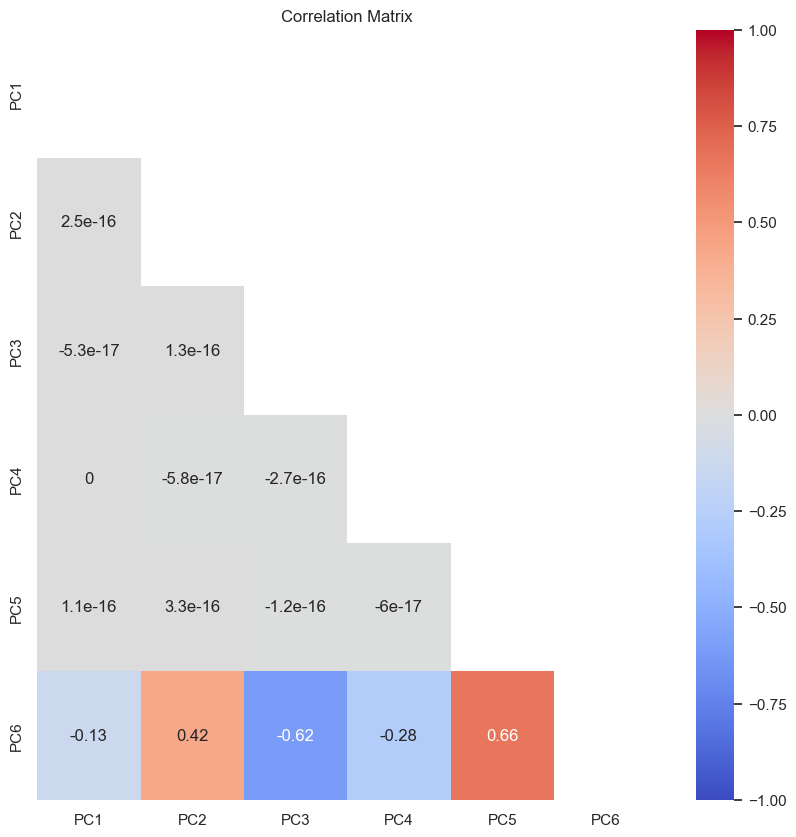

In [5]:
matriz_correlacion =df_pca.corr()
sns.set(style="white")

mask = np.zeros_like(matriz_correlacion, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the size of the figure
plt.figure(figsize=(10, 10))


# Create a heatmap with seaborn
sns.heatmap(matriz_correlacion, mask=mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Show the plot
plt.title('Correlation Matrix')
plt.show()